<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-and-Library-importation" data-toc-modified-id="Data-and-Library-importation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data and Library importation</a></span></li><li><span><a href="#Functions-creation-for-the-description-and-improvement-of-the-Dataset" data-toc-modified-id="Functions-creation-for-the-description-and-improvement-of-the-Dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Functions creation for the description and improvement of the Dataset</a></span></li><li><span><a href="#Density-plot" data-toc-modified-id="Density-plot-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Density plot</a></span></li><li><span><a href="#Plotting-with-transparency" data-toc-modified-id="Plotting-with-transparency-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Plotting with transparency</a></span></li><li><span><a href="#Plotting-with-Bokeh" data-toc-modified-id="Plotting-with-Bokeh-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Plotting with Bokeh</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

# Data and Library importation

In [1]:
path = '../2018 Mini-Challenge 1/'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Data importation
geo = pd.read_csv(path+'AllBirdsv4.csv', sep=',', header=0, encoding='utf-8')
geo.head()

,File ID,English_name,Vocalization_type,Quality,Time,Date,X,Y
0,402254,Rose-crested Blue Pipit,call,no score,13:30,2/8/2018,49,63
1,406171,Rose-crested Blue Pipit,call,A,7:48,6/7/2017,125,133
2,405901,Rose-crested Blue Pipit,call,A,12:00,2/8/2018,58,76
3,405548,Rose-crested Blue Pipit,song,A,11:00,3/10/2018,55,125
4,401782,Rose-crested Blue Pipit,song,A,6:00,6/29/2008,129,123


# Functions creation for the description and improvement of the Dataset

In [3]:
def description(dataframe=geo):
    """
    This function allows us to describe the dataset we have.

    input : 
        dataframe : dataframe to describe
    """
    print(dataframe.columns)
    print('---------')
    print(dataframe.info())
    print('---------')
    print(dataframe.describe(include='all'))
    print('---------')
    print('NA values for X column :' + str(dataframe['X'].isna().sum()))
    print('NA values for Y column : ' + str(dataframe['Y'].isna().sum()))
    for i in dataframe.columns:
        print(':::::')
        print(i)
        print(len(dataframe[i].unique()))
        if (len(dataframe[i].unique()) <= 20):
            print(dataframe[i].unique())
    print('---------')
    print(dataframe.head())


def codify(column):
    """
    This function allows to convert labels of categorical data into numbers -
    still categorical

    input : 
        column : column to convert
    """
    return pd.Categorical(column).codes

In [4]:
# Vocalization_type labels to correct (strip, lower and clean)
print("Before cleaning of Vocalization_type : {}".format(
    geo['Vocalization_type'].unique()))
geo['Vocalization_type'] = geo['Vocalization_type'].str.strip()
geo['Vocalization_type'] = geo['Vocalization_type'].str.lower()
geo['Vocalization_type'] = geo['Vocalization_type'].replace('?', None)
print("After cleaning of Vocalization_type : {}".format(
    geo['Vocalization_type'].unique()))

#Dates are of three different formats
geo['Date_Temp'] = pd.concat([
    pd.to_datetime(geo['Date'], errors='coerce', format="%m/%d/%Y").dropna(),
    pd.to_datetime(geo['Date'], errors='coerce', format="%Y-%m-%d").dropna(),
    pd.to_datetime(geo['Date'], errors='coerce', format="%Y-%m-00").dropna()
], axis=0)
geo = geo.loc[~geo['Date_Temp'].isna()].copy()

geo['Year'] = geo['Date_Temp'].dt.year

geo['Diff_date'] = (max(geo['Date_Temp'])-geo['Date_Temp']).dt.days

geo['cod_English_name'] = codify(geo['English_name'])
geo['cod_Vocalization_type'] = codify(geo['Vocalization_type'])
geo['cod_Quality'] = codify(geo['Quality'])

geo["Y"] = geo["Y"].map(lambda y: str(y).replace("?", ""))
geo["Y"] = geo["Y"].astype('int64')

geo['Distance_kasios'] = ((geo['X']-148)**2+(geo['Y']-159)**2)**0.5

# 2603 est le troisieme quartile
geo['Diff_date_norm'] = 1 - geo['Diff_date'] / 2603
geo.loc[geo.loc[:,'Diff_date_norm'] >= 1]['Diff_date_norm'] = 1
geo.loc[geo.loc[:,'Diff_date_norm'] <= 0]['Diff_date_norm'] = 0
geo = geo.dropna()
geo.head()

Before cleaning of Vocalization_type : ['call' 'song' 'Song' 'call, song' '?' 'Call' 'Call, song' ' call' 'scold'
 'drumming' 'bill-snapping']
After cleaning of Vocalization_type : ['call' 'song' 'call, song' 'scold' 'drumming' 'bill-snapping']


/home/comecothenet/Logiciels/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/comecothenet/Logiciels/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,File ID,English_name,Vocalization_type,Quality,Time,Date,X,Y,Date_Temp,Year,Diff_date,cod_English_name,cod_Vocalization_type,cod_Quality,Distance_kasios,Diff_date_norm
0,402254,Rose-crested Blue Pipit,call,no score,13:30,2/8/2018,49,63,2018-02-08,2018,37,16,1,5,137.902139,0.985786
1,406171,Rose-crested Blue Pipit,call,A,7:48,6/7/2017,125,133,2017-06-07,2017,283,16,1,0,34.713110,0.891279
2,405901,Rose-crested Blue Pipit,call,A,12:00,2/8/2018,58,76,2018-02-08,2018,37,16,1,0,122.429572,0.985786
3,405548,Rose-crested Blue Pipit,song,A,11:00,3/10/2018,55,125,2018-03-10,2018,7,16,5,0,99.020200,0.997311
4,401782,Rose-crested Blue Pipit,song,A,6:00,6/29/2008,129,123,2008-06-29,2008,3548,16,5,0,40.706265,-0.363043


In [74]:
def plotstack(column, percentage=False, elements=None) : 
    if elements : 
        df = geo[geo[column].isin(elements)]
    else :
        df = geo
    pvt = df.pivot_table(index=['Year'], columns=column, aggfunc='count')['Date']
    #pvt = df.pivot_table(index=['Date_Temp'].month, columns=column, aggfunc='count')['Year']
    if percentage :
        pvt = pvt.divide(pvt.sum(axis=1), axis=0)
    pvt.plot.area(
    figsize=(10, 10),
    title="Record {} for each year".format(column),
    legend='reverse'
    )

In [75]:
def plotline(column, percentage=False, elements=None) : 
    """
    Plots line of appearance as a function of Year Record
    inputs : 
        -column : the column to plot
        -percentage : whether you want it to be shown as percentage
        -elements : the elements of the column you want to use (use this arg to get only a few columns)
    """
    if elements : 
        df = geo[geo[column].isin(elements)]
    else :
        df = geo
    pvt = df.pivot_table(index=['Year'], columns=column, aggfunc='count')['Date']
    if percentage :
        pvt = pvt.divide(pvt.sum(axis=1), axis=0)
    pvt.plot.line(
        figsize=(10, 10),
        title="Record {} for each year".format(column),
        legend='reverse'
        )
#plotline('Vocalization_type', False)

In [76]:
def plotheat(column, df=geo) :
    fig, ax = plt.subplots(figsize=(20,5))
    pvt = df.pivot_table(index='Year', columns=column, aggfunc='count')['Date']
    sns.heatmap(pvt.T, cmap='Reds', annot=True)

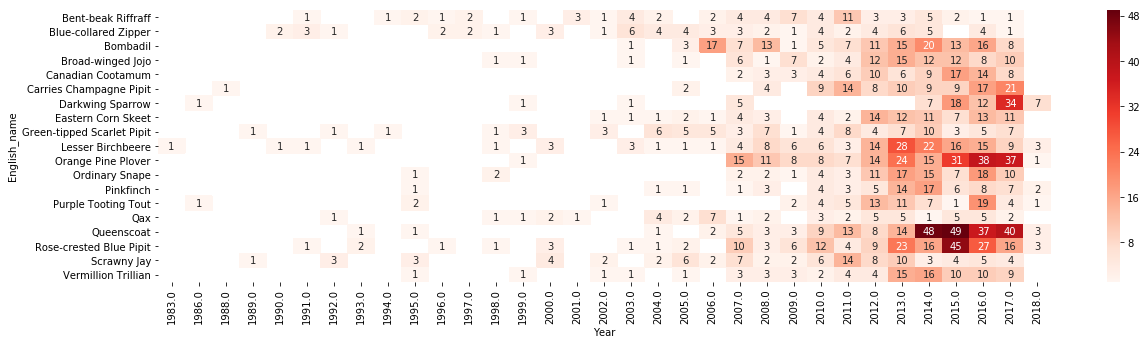

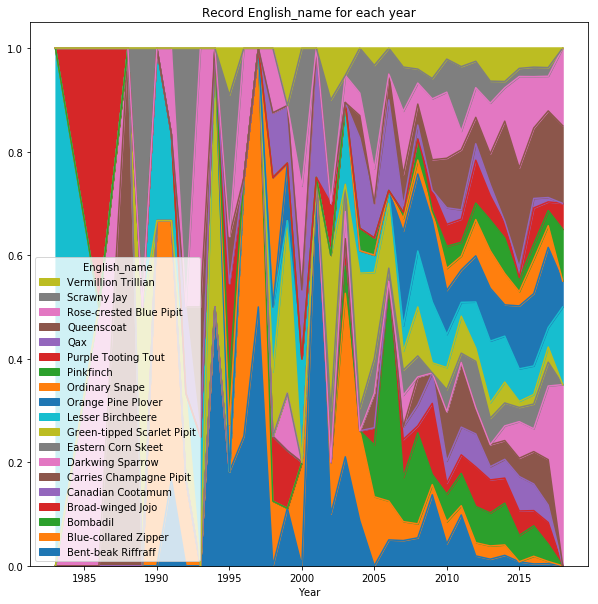

In [77]:
plotheat('English_name')
plotstack('English_name', True)

The first map shows the number of records per year per specie.
We can figure out that most of the records happend during the last years. About Rose-crested Blue Pipit, it is important to note that there were 45 records of this specie while only 27 the year after.

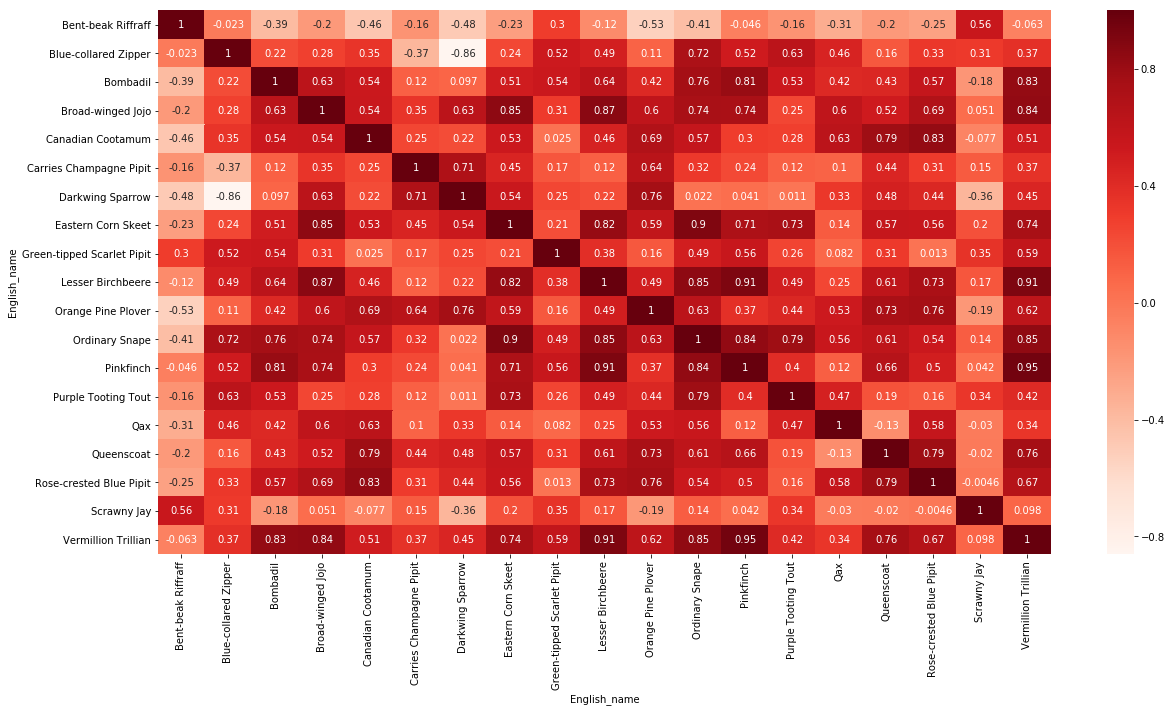

In [78]:
fig, ax = plt.subplots(figsize=(20,10))
pvt = geo.pivot_table(index=['Year'], columns='English_name', aggfunc='count')['Date']
sns.heatmap(pvt.corr(), annot=True, cmap='Reds')

This plot allows us to detect the correlation of records between species. Two specie are highly correlated if they improve at the same amount each year. This is useful because it tells us that Rose-crested Blue Pipit and Canadian Cootamum are very highly correlated. We can detect the high correlation with Queenscoat. This is useful because it means that an augmentation of frequency for one specie goes with an augmentation for another specie highly correlated at the same time.
We can notice that there is not enough elements of Canadian Cootamum to be confident about this correlation.

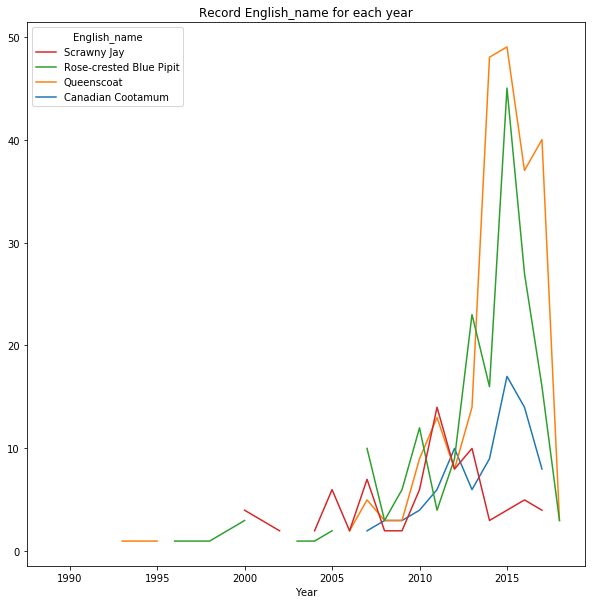

In [81]:
plotline('English_name', percentage=False, elements=['Rose-crested Blue Pipit', 'Queenscoat', 'Scrawny Jay', 'Canadian Cootamum'])

On this plotline, we can see that RCBP and Queenscoat are very look-alike, while Canadian Cootamum has the same shape, but not the same amplitude. Scrawny Jay, just shows what does a specie not correlated at all looks like.

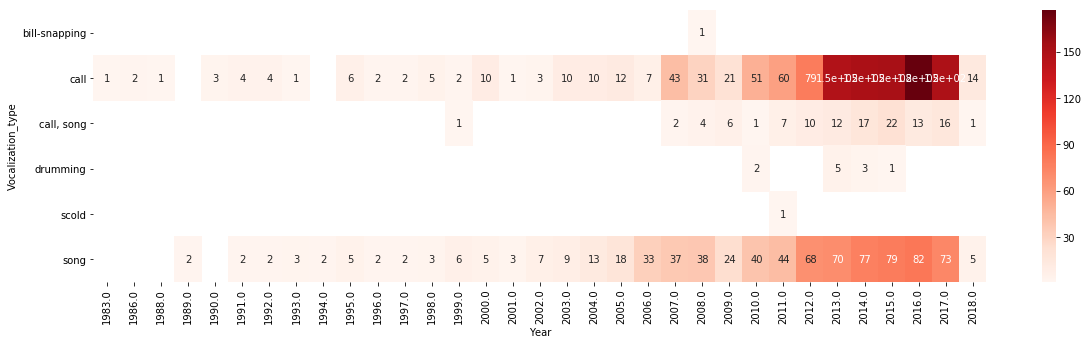

In [82]:
plotheat('Vocalization_type')

This plot shows us that drumming and scold are very rare, and they didn't even occur after 2015. Call and Song have a much higher frequency during the last 10 years, and it is totally normal, in reference to the augmentation of the records.

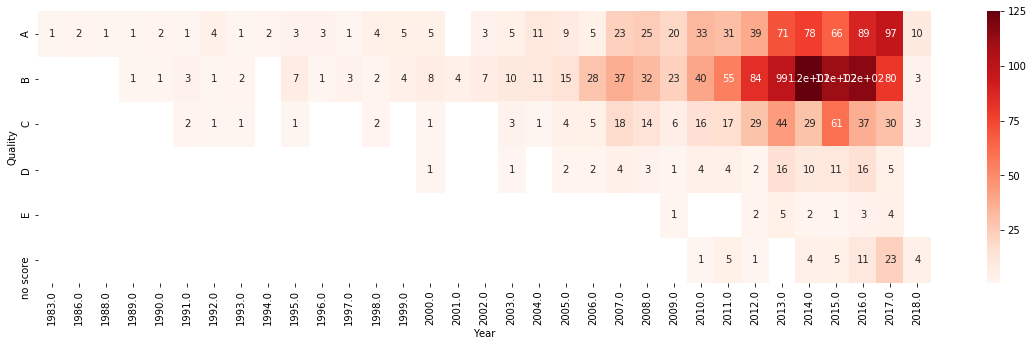

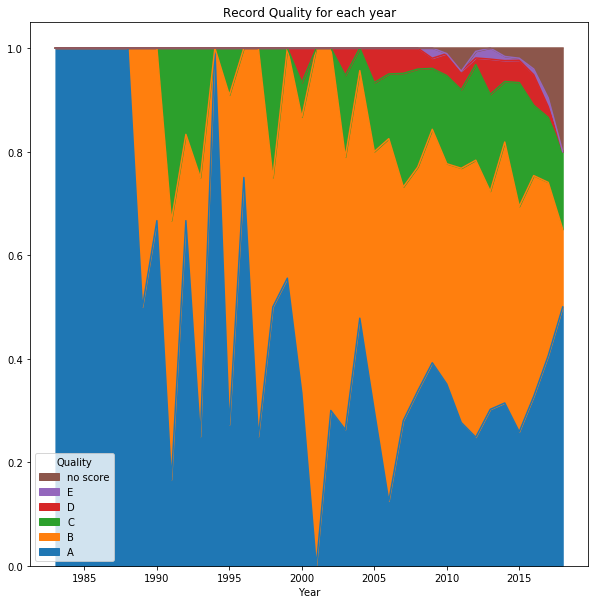

In [83]:
plotheat('Quality')
plotstack('Quality', True)

80% of the records are at least B-quality, which is a good score

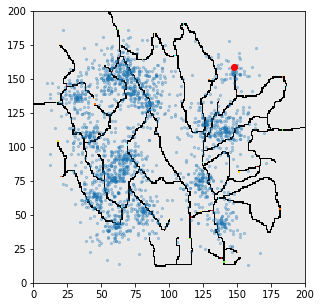

In [84]:
img = plt.imread(path+"Lekagul Roadways 2018.bmp")
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(img, extent=[0, 200, 0, 200])
plt.scatter(geo['X'], geo['Y'], s=5, alpha=0.3)
plt.scatter(148,159, c='red')
#plt.show()

#  Density plot
---------------
This density plot allows us to detect very easily where are the high-density zones of birds. We can find two very-high density zones on the east and consider that around Kasios plant, the density is quite low.

/home/comecothenet/Logiciels/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


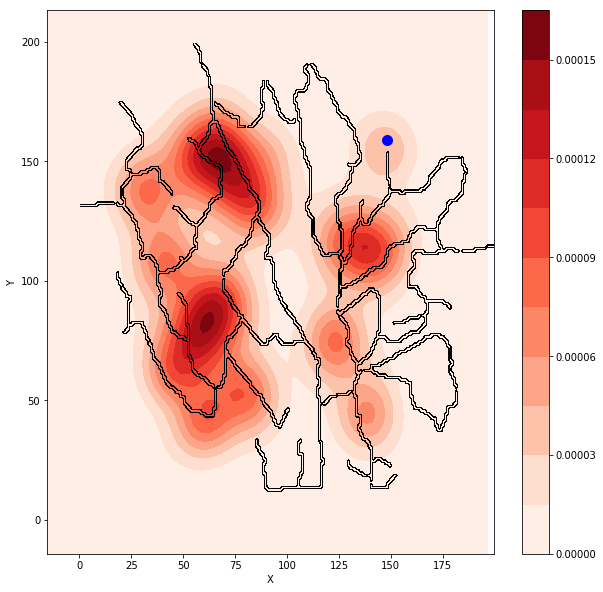

In [85]:
#pip install seaborn
import seaborn as sns
from PIL import Image
from pylab import *

plt.figure(figsize = (10,10))

sns.kdeplot(geo['X'], geo['Y'], cmap="Reds", shade_lowest=True, cbar=True, n_levels=10, shade=True)
image= array(Image.open(path+"Lekagul Roadways 2018.bmp").convert('L'))
contourf(image, levels=[110,120], colors='black', origin='image', extent=[0, 200, 0, 200])
plt.scatter(148,159, c='blue', s=100)
plt.show()

# Plotting with transparency
________________________________

In [91]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from PIL import Image
from pylab import *
from matplotlib import animation


%matplotlib notebook

<IPython.core.display.Javascript object>


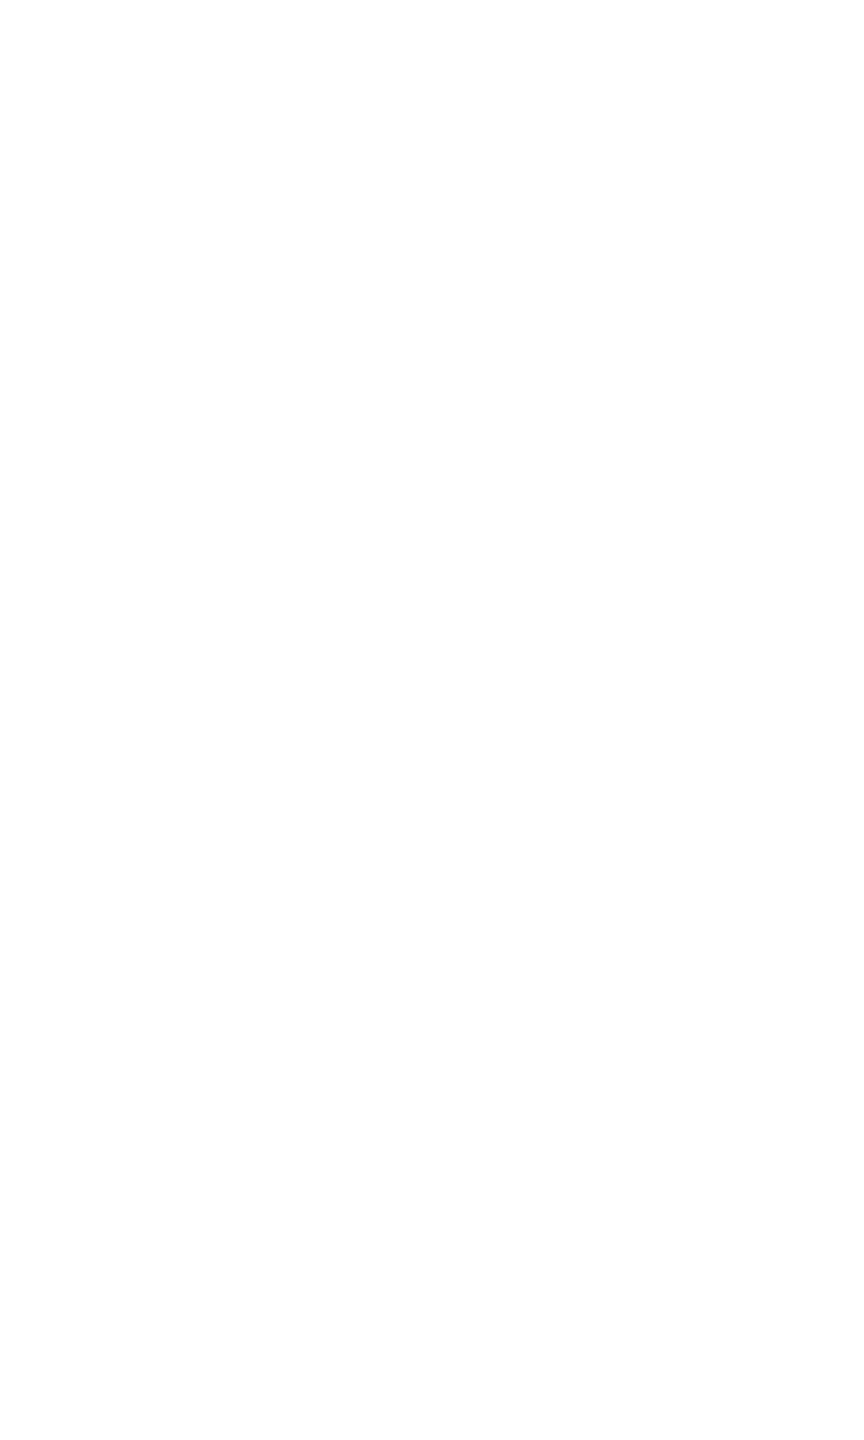

<IPython.core.display.Javascript object>


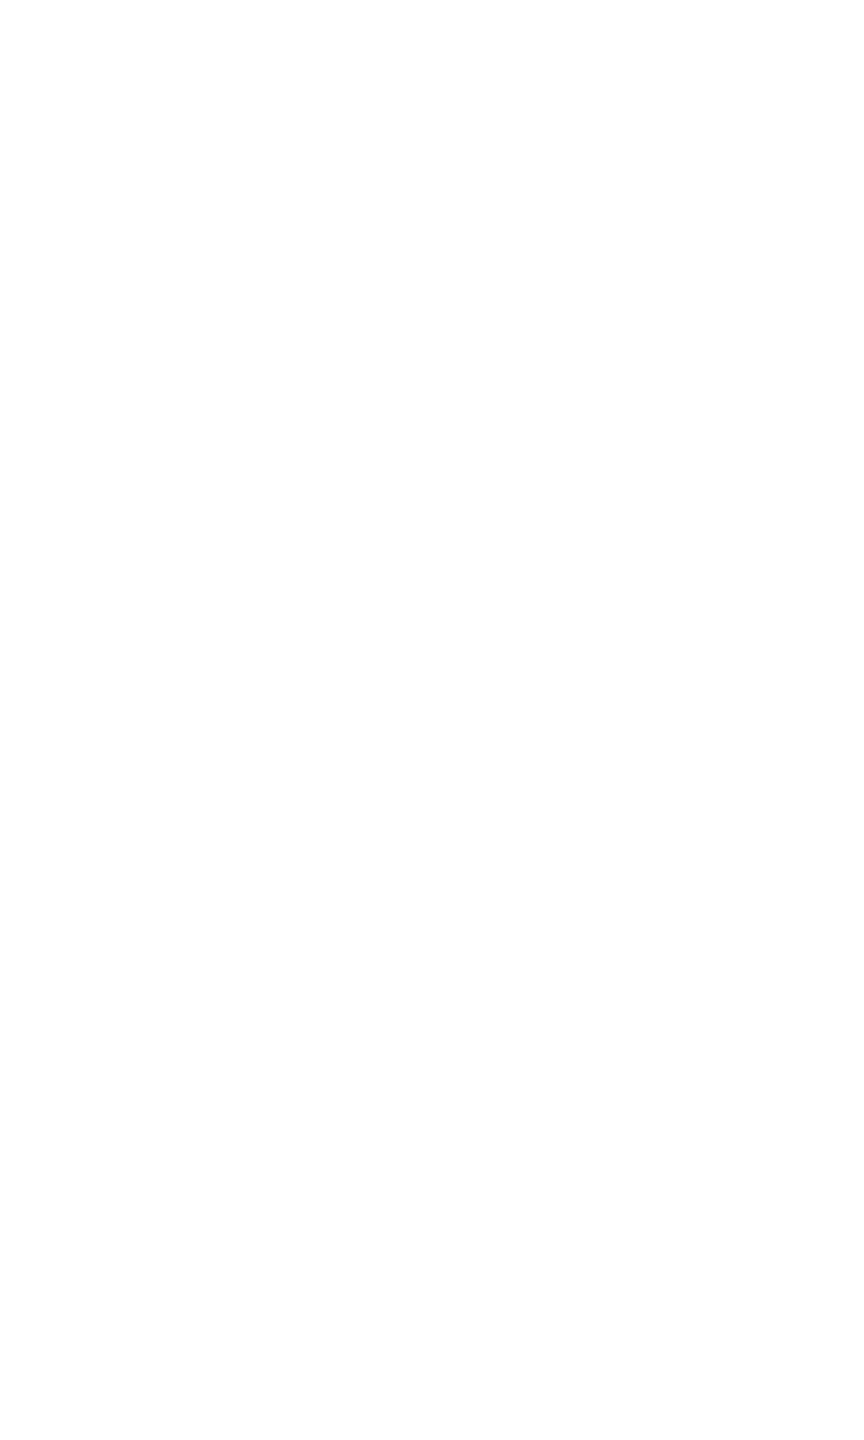

Traceback (most recent call last):
  File "/home/comecothenet/Logiciels/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py", line 387, in process
    proxy(*args, **kwargs)
  File "/home/comecothenet/Logiciels/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py", line 227, in __call__
    return mtd(*args, **kwargs)
  File "/home/comecothenet/Logiciels/anaconda3/lib/python3.7/site-packages/matplotlib/animation.py", line 1499, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


In [98]:
ename = geo['English_name'].unique()
cod_ename = geo['cod_English_name'].unique()
# cod_ename=[0,1]
image= array(Image.open(path+"Lekagul Roadways 2018.bmp").convert('L'))




fig, (ax) = plt.subplots(int(len(cod_ename)/3), 3, figsize=(12, 20))

line0, = ax[0][0].plot([], [], 'bo', alpha=0.5, c='green')
line1, = ax[0][1].plot([], [], 'bo', alpha=0.5)
line2, = ax[0][2].plot([], [], 'bo', alpha=0.5)
line3, = ax[1][0].plot([], [], 'bo', alpha=0.5)
line4, = ax[1][1].plot([], [], 'bo', alpha=0.5)
line5, = ax[1][2].plot([], [], 'bo', alpha=0.5)
line6, = ax[2][0].plot([], [], 'bo', alpha=0.5)
line7, = ax[2][1].plot([], [], 'bo', alpha=0.5)
line8, = ax[2][2].plot([], [], 'bo', alpha=0.5)
line9, = ax[3][0].plot([], [], 'bo', alpha=0.5)
line10, = ax[3][1].plot([], [], 'bo', alpha=0.5)
line11, = ax[3][2].plot([], [], 'bo', alpha=0.5)
line12, = ax[4][0].plot([], [], 'bo', alpha=0.5)
line13, = ax[4][1].plot([], [], 'bo', alpha=0.5)
line14, = ax[4][2].plot([], [], 'bo', alpha=0.5)
line15, = ax[5][0].plot([], [], 'bo', alpha=0.5)
line16, = ax[5][1].plot([], [], 'bo', alpha=0.5)
line17, = ax[5][2].plot([], [], 'bo', alpha=0.5)
# line18, = ax[6][0].plot([], [], 'bo', alpha=0.5)

tot_line = [line0, line1, line2, line3, line4, line5, line6, line7, line8, line9,
           line10, line11, line12, line13, line14, line15, line16, line17]
# tot_line = [line0, line1]

for a in ax :
    for axi in a : 
        axi.set_ylim(0, 200)
        axi.set_xlim(0, 200)
        axi.grid()
        axi.contourf(image, levels=[110,120], colors='black', origin='image', extent=[0, 200, 0, 200])
        axi.scatter(148,159, color='r')
        
    
def init() : 
    pass

def update(i) : 
    temp = geo[geo['Year']==i]
    for j in range(len(cod_ename)) :
        temp2 = temp[temp['cod_English_name']==j][['X','Y','cod_English_name','English_name', 'Year']]
        xdata = (temp2['X'])
        ydata = (temp2['Y'])
        tot_line[j].set_data(xdata, ydata)
        ax[int(j/3)][j%3].set_title("{} à l'année {}".format(ename[j], i))
    return tot_line


# read image to array
ani = animation.FuncAnimation(fig, update, frames=range(2000,2018), init_func=init, blit=True, interval=1500)
plt.tight_layout()
plt.show()

# Plotting with Bokeh
________________________________



In [17]:
from bokeh import *
from bokeh.palettes import Category20

In [18]:
#pip install bokeh
#pip install pscript

import numpy as np
import pandas as pd
from datetime import date, datetime, timedelta
from time import sleep

from bokeh.plotting import figure, show, output_file
from bokeh.io import output_notebook, show, curdoc
from bokeh.palettes import Category20
from bokeh.transform import factor_cmap
from bokeh.layouts import layout, column, row
from bokeh.models import ColumnDataSource, HoverTool, Plot, LinearAxis, Grid, CustomJS
from bokeh.models.widgets import MultiSelect, DateRangeSlider
from bokeh.models.glyphs import ImageURL

output_notebook()

##Import and Clean AllBirds
geo = pd.read_csv(path+"AllBirdsv4.csv")
geo['Vocalization_type'] = geo['Vocalization_type'].str.strip()
geo['Vocalization_type'] = geo['Vocalization_type'].str.lower()
geo['Vocalization_type'] = geo['Vocalization_type'].replace('?', None)
geo['Vocalization_type'].unique()
geo['Date'] = pd.to_datetime(geo['Date'], format='%m/%d/%Y', errors='coerce')
geo['cod_English_name'] = pd.Categorical(geo['English_name']).codes
geo['cod_Vocalization_type'] = pd.Categorical(geo['Vocalization_type']).codes
geo['cod_Quality'] = pd.Categorical(geo['Quality']).codes
geo['Y'] = pd.to_numeric(geo['Y'], errors='coerce')
geo['Year'] = geo['Date'].dt.year
geo['Distance_kasios'] = ((geo['X']-148)**2+(geo['Y']-159)**2)**0.5
geo['Diff_date']=(max(geo['Date'])-geo['Date']).dt.days
geo=geo.dropna()

#Add Colors for type of Birds
birds_types = geo['English_name'].sort_values().unique()
n_birds_types = len(birds_types)
birds_types_colors = pd.Series(Category20[n_birds_types], index = birds_types).rename('color')
geo = geo.join(birds_types_colors, on = "English_name") 

# Import Kassios Birds
K_birds=pd.read_csv(path+"Test Birds Location.csv", sep=',',header=0)
K_birds.columns=['Id', 'X', 'Y']

startdate = pd.to_datetime(geo['Date'].sort_values().unique()[0])
enddate = pd.to_datetime(geo['Date'].sort_values().unique()[-1])

def birds_map(doc):

    source = ColumnDataSource(data=dict(x=geo['X'], y=geo['Y'], color=geo['color'], date=geo['Date'], English_name = geo['English_name']))
    
    p = figure(title="Map with birds through time", x_range=(0, 200), y_range=(0, 200))
    
    #background image
    p.image_url( url=[r"Lekagul Roadways 2018.bmp"],x=0, y=0, w=200, h=200, anchor="bottom_left")
    
    #plot info when passing with mouse
    hover = HoverTool()
    hover.tooltips = [
        ("Bird type", "@English_name"),
        ("Position", "(@x, @y)"),
    ]
    p.tools.append(hover)
    
    #points
    p.circle(x='x', y='y', size=10, color='color', source=source)

    #Add Kassios Birds 
    source_kassios = ColumnDataSource(data=dict(x=K_birds['X'], y=K_birds['Y'], English_name = K_birds['Id']))
    p.scatter(x="x", y="y", size=30, marker="ox", fill_alpha=0.2, line_width=2, source=source_kassios, legend="Kassios Birds")

    #Kassios Entreprise location
    source_dumping = ColumnDataSource(data=dict(x=[148], y=[159], English_name=[""]))
    p.scatter(x="x", y="y", size=50, marker="o+", color="#B22222", fill_alpha=0.2, line_width=2, source=source_dumping, legend="Kassios Entreprise")

    #Widgets
    input_bird_types = MultiSelect(title="Species", options= list(birds_types) , size = n_birds_types)
    date_range_slider = DateRangeSlider(title="Date Range: ", start=startdate, end=enddate, value=(startdate, enddate), step=1)
    
    def update():  
        bird_types = input_bird_types.value
        selector_types = geo['English_name'].isin(bird_types)
        date_range = date_range_slider.value_as_datetime
        selector_date = (pd.to_datetime(geo['Date']) > date_range[0]) & ( pd.to_datetime(geo['Date'])<= date_range[1])
        geo_selected = geo.loc[selector_types & selector_date].copy() # Selection
        source.data = dict(
            x=geo_selected['X'],
            y=geo_selected['Y'],
            color=geo_selected["color"],
            date=geo_selected["Date"],
            English_name=geo_selected["English_name"],
        )
        
    #callbacks
    input_bird_types.on_change('value', lambda attr, old, new: update())
    date_range_slider.on_change('value', lambda attr, old, new: update())
    
    #display widget
    l = column(row(p,column(input_bird_types,date_range_slider)))
    doc.add_root(l)

show(birds_map)

Loading BokehJS ...

# Conclusion

Finally, we have obtained some interesting informations : First, some vocalization types are very rare, and we have to focus on singing and calling. Then, more than 80% of the records are in a good quality. The number of records increased neatly during the last ten years.

Then, we have seen 2 very high-density zones of birds and some few denses others. Kasios plant is on a medium-density zone. 

The specie that we want to study : Rose-crested Blue Pipits, are located near Kasios plant originally. Their record number is highly correlated with Queenscoats, which barycenter is located further west.

Kasios records are strangely located, they should not concern Rose-crested Blue Pipits, because it is very far from their original location.